# FEAR/GREED PROJECT

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datasets

In [2]:
df_1 = pd.read_csv(r"C:\Users\samkh\OneDrive\Desktop\Jupyter\GREEK Series\Project Alpha\Fear-greed\historical_data.csv")
df_1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
df_2 = pd.read_csv(r"C:\Users\samkh\OneDrive\Desktop\Jupyter\GREEK Series\Project Alpha\Fear-greed\fear_greed_index.csv")
df_2.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


### Data Pre-Processing

In [4]:
df_1.isnull().values.any()

np.False_

In [5]:
df_2.isnull().values.any()

np.False_

In [6]:
df_1.drop_duplicates(inplace=True)
df_2.drop_duplicates(inplace=True)

In [7]:
df_1.rename(columns={'Timestamp': 'A-Timestamp'}, inplace=True)
df_1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,A-Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
df_2.rename(columns={'timestamp': 'B-Timestamp'}, inplace=True)
df_2.head()

,B-Timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
df_1['A-Timestamp'] = df_1['A-Timestamp']/1000

In [10]:
df_1['date'] = pd.to_datetime(df_1['A-Timestamp'], unit='s').dt.date

In [11]:
df_1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,A-Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+09,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+09,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+09,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+09,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+09,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+09,2025-06-15
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+09,2025-06-15
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+09,2025-06-15
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+09,2025-06-15


In [12]:
df_1.columns = df_1.columns.str.strip().str.lower()
df_2.columns = df_2.columns.str.strip().str.lower()

In [13]:
import pytz
IST = pytz.timezone("Asia/Kolkata")

# Convert timestamps to datetime and round/truncate to daily granularity
df_1['datetime'] = pd.to_datetime(df_1['a-timestamp'], unit='s', utc=True).dt.tz_convert(IST)
df_2['datetime'] = pd.to_datetime(df_2['b-timestamp'], unit='s', utc=True).dt.tz_convert(IST)

# Sort by datetime (REQUIRED for merge_asof)
df_1 = df_1.sort_values('datetime')
df_2 = df_2.sort_values('datetime')

In [14]:
# Merge each trade with the **last available sentiment** at or before the trade time
df_all = pd.merge_asof(
    df_1, df_2[['datetime', 'value', 'classification']],
    on='datetime',
    direction='backward',   # closest previous sentiment
    tolerance=pd.Timedelta('1D')  # Optional: max 1-day gap
)


In [15]:
df_all[['datetime', 'value', 'classification']]

,datetime,value,classification
0,2023-03-28 16:10:00+05:30,59.0,Greed
1,2023-03-28 16:10:00+05:30,59.0,Greed
2,2023-03-28 16:10:00+05:30,59.0,Greed
3,2023-11-15 03:43:20+05:30,69.0,Greed
4,2023-11-15 03:43:20+05:30,69.0,Greed
...,...,...,...
211219,2025-06-15 20:36:40+05:30,NaN,NaN
211220,2025-06-15 20:36:40+05:30,NaN,NaN
211221,2025-06-15 20:36:40+05:30,NaN,NaN
211222,2025-06-15 20:36:40+05:30,NaN,NaN


In [16]:
def count_null_values(df):
    
    total_nulls = df_all.isnull().sum().sum()
    nulls_per_column = df_all.isnull().sum()
    
    print("Total Null Values:", total_nulls)
    print("\nNulls per Column:")
    print(nulls_per_column)
    
    return total_nulls, nulls_per_column


In [17]:
total_nulls, column_nulls = count_null_values(df_all)

Total Null Values: 124404

Nulls per Column:
account                 0
coin                    0
execution price         0
size tokens             0
size usd                0
side                    0
timestamp ist           0
start position          0
direction               0
closed pnl              0
transaction hash        0
order id                0
crossed                 0
fee                     0
trade id                0
a-timestamp             0
date                    0
datetime                0
value               62202
classification      62202
dtype: int64


Dropping NULL Values (For Convenience)

In [18]:
df_all.dropna(inplace=True)
total_nulls, column_nulls = count_null_values(df_all)

Total Null Values: 0

Nulls per Column:
account             0
coin                0
execution price     0
size tokens         0
size usd            0
side                0
timestamp ist       0
start position      0
direction           0
closed pnl          0
transaction hash    0
order id            0
crossed             0
fee                 0
trade id            0
a-timestamp         0
date                0
datetime            0
value               0
classification      0
dtype: int64


In [19]:
df_all['pnl_flag'] = df_all['closed pnl'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Neutral'))

df_all['size_bucket'] = pd.qcut(df_all['size usd'], q=3, labels=['Small', 'Medium', 'Large'])

df_all['sentiment_strength'] = pd.cut(
    df_all['value'], bins=[0, 25, 50, 75, 100],
    labels=['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed']
)


### Feature Selection

Trade Lables For Profit, Loss & Neutral

In [20]:
df_all['pnl_flag'] = df_all['closed pnl'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Neutral'))

Group Trades by Size

In [21]:
df_all['size_bucket'] = pd.qcut(df_all['size usd'], q=3, labels=['Small', 'Medium', 'Large'])

Calculate leverage

In [22]:
df_all['estimated_leverage'] = df_all['size usd'] / (df_all['size usd'] * df_all['execution price'])

In [23]:
df_all

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,...,trade id,a-timestamp,date,datetime,value,classification,pnl_flag,size_bucket,sentiment_strength,estimated_leverage
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.60000,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.000000,...,0.000000e+00,1.680000e+09,2023-03-28,2023-03-28 16:10:00+05:30,59.0,Greed,Neutral,Small,Greed,0.000527
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.90000,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.000000,...,0.000000e+00,1.680000e+09,2023-03-28,2023-03-28 16:10:00+05:30,59.0,Greed,Neutral,Small,Greed,0.000527
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.90000,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.000000,...,0.000000e+00,1.680000e+09,2023-03-28,2023-03-28 16:10:00+05:30,59.0,Greed,Neutral,Small,Greed,0.000527
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,SEI,0.44868,15078.0000,6765.20,SELL,28-12-2023 06:52,37599.0000,Close Long,-160.580700,...,2.830000e+14,1.700000e+09,2023-11-14,2023-11-15 03:43:20+05:30,69.0,Greed,Loss,Large,Greed,2.228760
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,NTRN,1.46680,3348.0000,4910.85,SELL,07-01-2024 06:27,14206.0000,Close Long,-13.432176,...,4.030000e+14,1.700000e+09,2023-11-14,2023-11-15 03:43:20+05:30,69.0,Greed,Loss,Large,Greed,0.681756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,TAO,357.35000,0.5150,184.04,BUY,26-02-2025 00:51,105.9140,Open Long,0.000000,...,8.590000e+14,1.740000e+09,2025-02-19,2025-02-20 02:50:00+05:30,44.0,Fear,Neutral,Small,Fear,0.002798
184259,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,TAO,357.35000,0.1540,55.03,BUY,26-02-2025 00:51,106.4290,Open Long,0.000000,...,6.510000e+14,1.740000e+09,2025-02-19,2025-02-20 02:50:00+05:30,44.0,Fear,Neutral,Small,Fear,0.002798
184260,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,ONDO,0.99294,721.0000,715.91,BUY,27-02-2025 07:03,29919.0000,Open Long,0.000000,...,5.000000e+14,1.740000e+09,2025-02-19,2025-02-20 02:50:00+05:30,44.0,Fear,Neutral,Medium,Fear,1.007110
184261,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,ONDO,0.99304,975.0000,968.21,BUY,27-02-2025 07:03,30640.0000,Open Long,0.000000,...,5.570000e+14,1.740000e+09,2025-02-19,2025-02-20 02:50:00+05:30,44.0,Fear,Neutral,Medium,Fear,1.007009


### Findings

#### 1. Do traders make more money during Greed or Fear?

In [27]:
df_all.groupby('sentiment_strength')['closed pnl'].mean()

df_all.groupby('sentiment_strength')['pnl_flag'].value_counts(normalize=True).unstack()

C:\Users\samkh\AppData\Local\Temp\ipykernel_22148\2121653780.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_all.groupby('sentiment_strength')['closed pnl'].mean()
C:\Users\samkh\AppData\Local\Temp\ipykernel_22148\2121653780.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_all.groupby('sentiment_strength')['pnl_flag'].value_counts(normalize=True).unstack()


pnl_flag,Loss,Neutral,Profit
sentiment_strength,,,
Extreme Fear,0.000000,0.000000,0.000000
Fear,0.067420,0.522395,0.410185
Greed,0.187023,0.539122,0.273855
Extreme Greed,0.132146,0.377765,0.490089


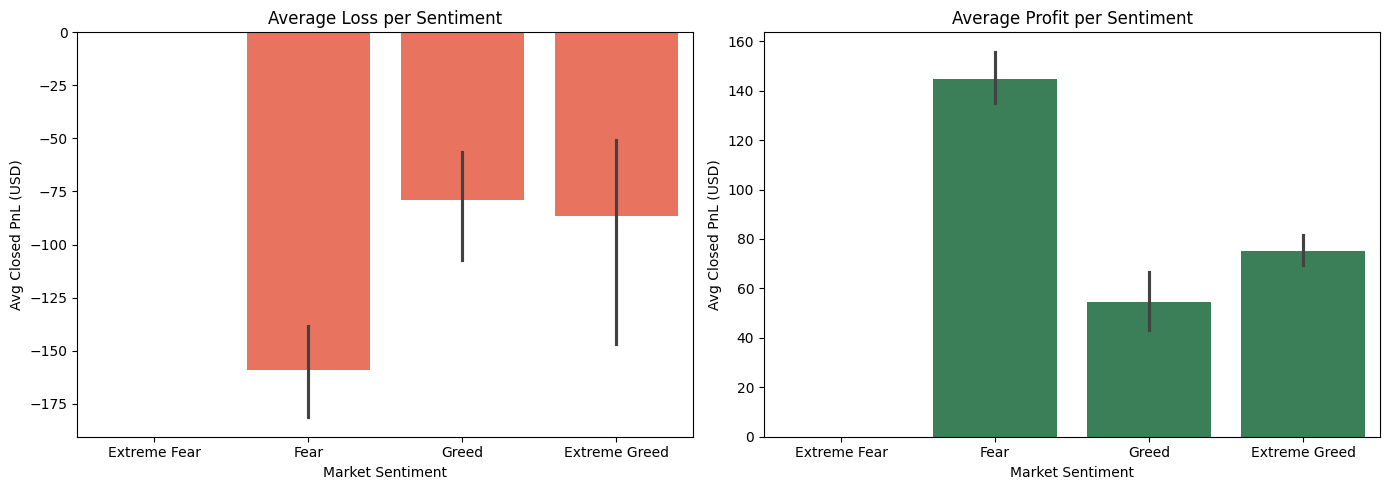

In [41]:
loss_df   = df_all[df_all['pnl_flag'] == 'Loss']
profit_df = df_all[df_all['pnl_flag'] == 'Profit']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(
    data       = loss_df,
    x          = 'sentiment_strength',
    y          = 'closed pnl',
    estimator  = 'mean',
    color      = 'tomato',
    ax         = axes[0]
)
axes[0].set_title('Average Loss per Sentiment')
axes[0].set_xlabel('Market Sentiment')
axes[0].set_ylabel('Avg Closed PnL (USD)')

sns.barplot(
    data       = profit_df,
    x          = 'sentiment_strength',
    y          = 'closed pnl',
    estimator  = 'mean',
    color      = 'seagreen',
    ax         = axes[1]
)
axes[1].set_title('Average Profit per Sentiment')
axes[1].set_xlabel('Market Sentiment')
axes[1].set_ylabel('Avg Closed PnL (USD)')

plt.tight_layout()   # neat spacing
plt.show()

#### 2. Do traders take more risk during Greed?

In [28]:
df_all.groupby('sentiment_strength')['estimated_leverage'].mean()

pd.crosstab(df_all['sentiment_strength'], df_all['size_bucket'], normalize='index')

C:\Users\samkh\AppData\Local\Temp\ipykernel_22148\450688838.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_all.groupby('sentiment_strength')['estimated_leverage'].mean()


size_bucket,Small,Medium,Large
sentiment_strength,,,
Fear,0.336312,0.339375,0.324313
Greed,0.185115,0.145992,0.668893
Extreme Greed,0.295317,0.239155,0.465527


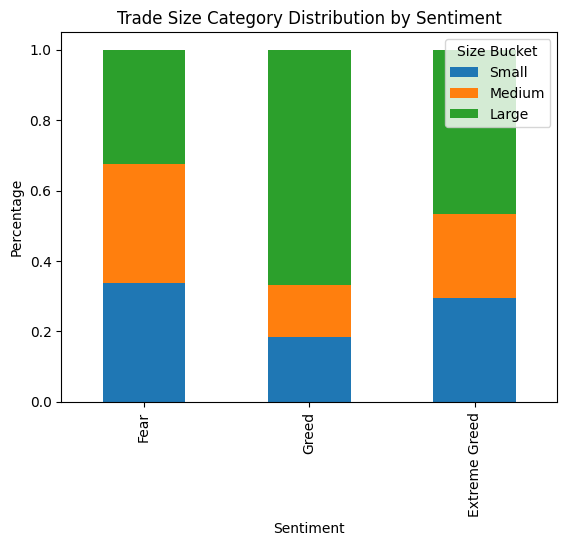

In [42]:
# Distribution of size buckets
size_dist = pd.crosstab(df_all['sentiment_strength'], df_all['size_bucket'], normalize='index')

size_dist.plot(kind='bar', stacked=True)
plt.title('Trade Size Category Distribution by Sentiment')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')
plt.legend(title='Size Bucket')
plt.show()

 #### 3. Are some traders better in fearful markets than others?

In [29]:
df_all.groupby(['account', 'sentiment_strength'])['closed pnl'].sum().unstack()

C:\Users\samkh\AppData\Local\Temp\ipykernel_22148\203681056.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_all.groupby(['account', 'sentiment_strength'])['closed pnl'].sum().unstack()


sentiment_strength,Extreme Fear,Fear,Greed,Extreme Greed
account,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,0.0,1.927736e+06,0.000000,0.000000
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.0,1.709873e+04,0.000000,0.000000
0x271b280974205ca63b716753467d5a371de622ab,0.0,2.996993e+04,0.000000,0.000000
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.0,1.043510e+04,0.000000,0.000000
0x2c229d22b100a7beb69122eed721cee9b24011dd,0.0,1.164123e+05,0.000000,0.000000
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.0,-5.913392e+04,0.000000,-5564.016140
0x39cef799f8b69da1995852eea189df24eb5cae3c,0.0,-2.052646e+04,0.000000,0.000000
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,0.0,4.588363e+04,0.000000,0.000000
0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.0,1.834030e+05,0.000000,0.000000


C:\Users\samkh\AppData\Local\Temp\ipykernel_22148\1812983513.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trader_sentiment = df_all.groupby(['account', 'sentiment_strength'])['closed pnl'].sum().unstack(fill_value=0)


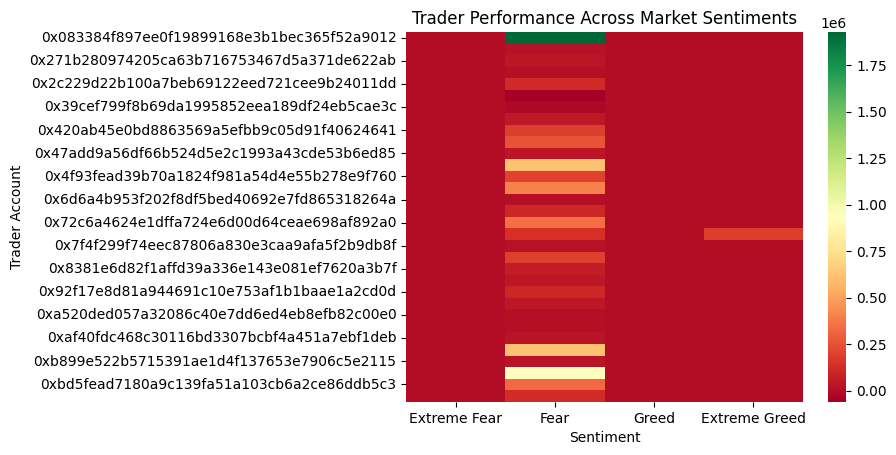

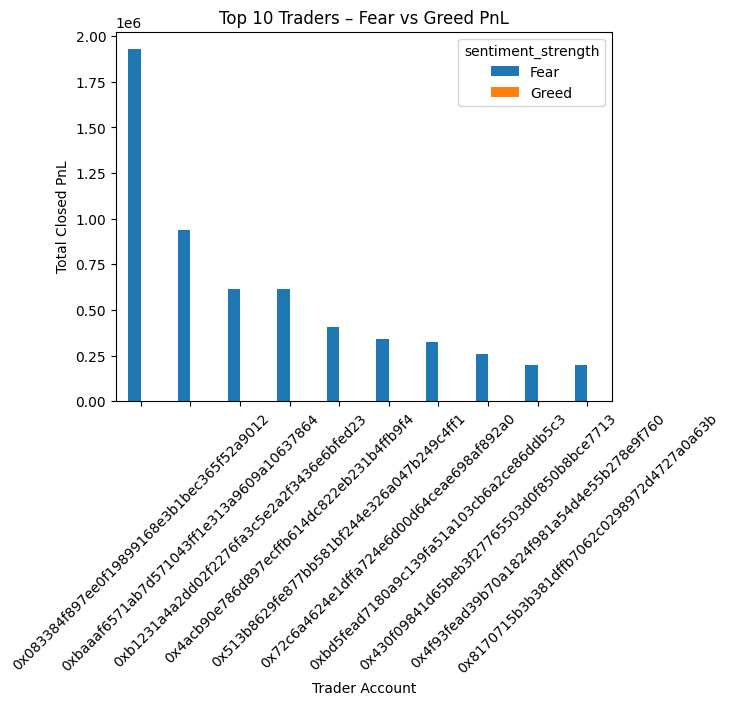

In [43]:
# Heatmap: Trader vs Sentiment PnL
trader_sentiment = df_all.groupby(['account', 'sentiment_strength'])['closed pnl'].sum().unstack(fill_value=0)
sns.heatmap(trader_sentiment, cmap='RdYlGn', annot=False)
plt.title('Trader Performance Across Market Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Trader Account')
plt.show()

# Top 10 traders in Fear
top_fear = trader_sentiment.sort_values(by='Fear', ascending=False).head(10)

top_fear[['Fear', 'Greed']].plot(kind='bar')
plt.title('Top 10 Traders – Fear vs Greed PnL')
plt.ylabel('Total Closed PnL')
plt.xlabel('Trader Account')
plt.xticks(rotation=45)
plt.show()
